In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [6]:
f1=nc.Dataset('/results2/SalishSea/nowcast-green.202111/26jul23/SalishSea_1d_20230726_20230726_graz_T.nc')

In [7]:
print(f1.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'MORTPHY', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MORTDIAT', 'MORTMICZ', 'GRMESZDIAT', 'GRMESZPHY', 'GRMESZPON', 'GRMESZMICZ', 'GRMICZDIAT', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ'])


In [64]:
Z1_Prod=f1.variables['GRMICZDIAT'][il,...]+f1.variables['GRMICZPHY'][il,...]+\
                                  f1.variables['GRMICZMICZ'][il,...]+f1.variables['GRMICZPON'][il,...]

In [65]:
Z2_Prod=f1.variables['GRMESZDIAT'][il,...]+f1.variables['GRMESZPHY'][il,...]+\
                                  +f1.variables['GRMESZMICZ'][il,...]+f1.variables['GRMESZPON'][il,...]

In [71]:
Z1_Prod.mean()*86400*0.3*5.7*12

1.9261229690926265

In [72]:
Z1_Prod.max()*86400*0.3*5.7*12

25.085425907280296

In [67]:
Z2_Prod.mean()*86400*0.3*5.7*12

2.442660621369388

In [73]:
Z2_Prod.max()*86400*0.3*5.7*12

75.82085458561778

### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [68]:
#open bathy file and meshmask
fbathy=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc')
fmesh=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask202108.nc')

Text(0.5, 0.98, 'Z2 Productivity')

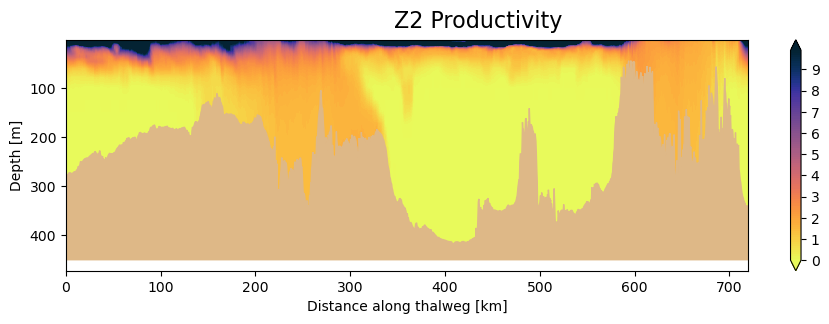

In [76]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 10, 0.1)

cb=visualisations.contour_thalweg(ax,Z2_Prod*86400*0.3*5.7*12,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.thermal_r)

fig.suptitle('Z2 Productivity', fontsize=16)
#plt.savefig('MesozoopThalweg.jpg', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 0.98, 'Z1 Productivity')

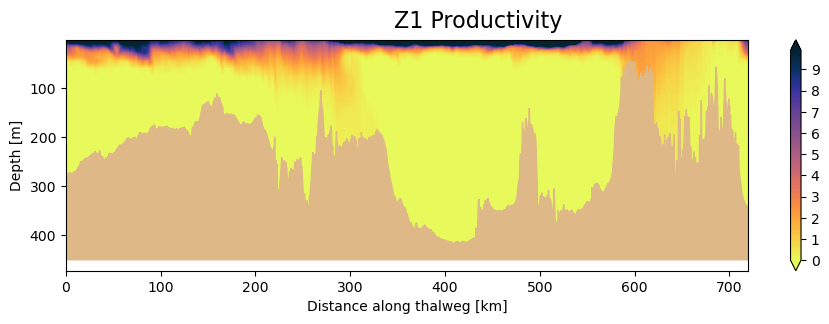

In [78]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 10, 0.1)

cb=visualisations.contour_thalweg(ax,Z1_Prod *86400*0.3*5.7*12,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.thermal_r)

fig.suptitle('Z1 Productivity', fontsize=16)
#plt.savefig('MesozoopThalweg.jpg', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 0.98, 'Zooplankton Productivity')

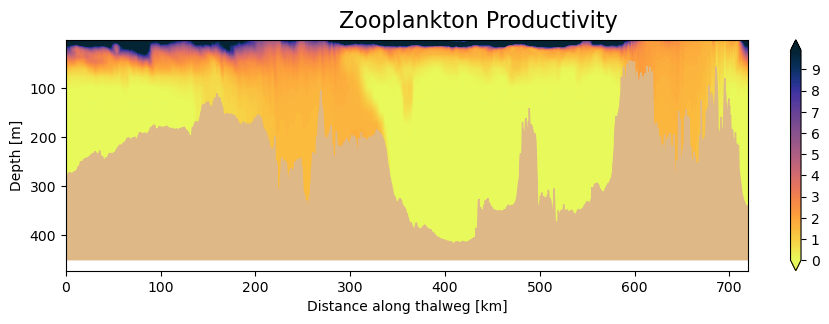

In [84]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 10, 0.1)

cb=visualisations.contour_thalweg(ax,Z1_Prod+Z2_Prod*86400*0.3*5.7*12,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.thermal_r)

fig.suptitle('Zooplankton Productivity', fontsize=16)
#plt.savefig('MesozoopThalweg.jpg', bbox_inches='tight',dpi=1000,transparent=False)


In [ ]:
f1.close()